## Importing Required Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

%matplotlib inline

## Loading the DashDoor Dataset 

In [2]:
dash=pd.read_csv('C:\\Users\\Vijay\\Downloads\\historical_data.csv')
dash.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


#### Appling basic Data Pre-Processing 

In [3]:
dash.shape

(197428, 16)

In [4]:
dash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
market_id                                       196441 non-null float64
created_at                                      197428 non-null object
actual_delivery_time                            197421 non-null object
store_id                                        197428 non-null int64
store_primary_category                          192668 non-null object
order_protocol                                  196433 non-null float64
total_items                                     197428 non-null int64
subtotal                                        197428 non-null int64
num_distinct_items                              197428 non-null int64
min_item_price                                  197428 non-null int64
max_item_price                                  197428 non-null int64
total_onshift_dashers                           181166 non-null float64
total_busy_dashers                      

In [5]:
dash.isnull().sum().sum()

56061

<AxesSubplot:>

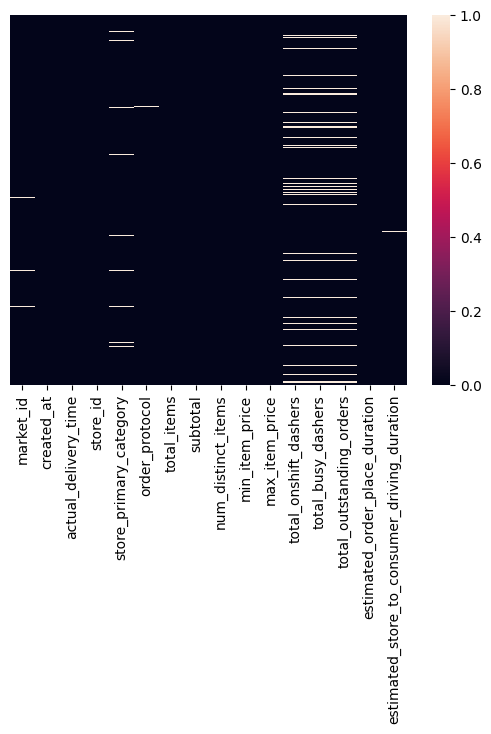

In [6]:
sns.heatmap(dash.isnull(), yticklabels=False)

In [7]:
missing=(dash.isnull().sum().sum()/np.product(dash.shape) ) * 100
print('Data Missing: ',missing,'%')

Data Missing:  1.7747292683915148 %


In [8]:
dash.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

#### As we can see the data contains more missing values in the columns total_onshift_dashers, total_busy_dashers, total_outstanding_orders

In [9]:
missing_value=["NA","nan"," ","NaN"]
df1 = pd.read_csv('C:\\Users\\Vijay\\Downloads\\historical_data.csv',na_values=missing_value)

In [10]:
df1.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [11]:
## Using interplotion handling the missing data in columns
df1 =df1.interpolate()

In [12]:
df1.isnull().sum()

market_id                                          0
created_at                                         0
actual_delivery_time                               7
store_id                                           0
store_primary_category                          4760
order_protocol                                     0
total_items                                        0
subtotal                                           0
num_distinct_items                                 0
min_item_price                                     0
max_item_price                                     0
total_onshift_dashers                              0
total_busy_dashers                                 0
total_outstanding_orders                           0
estimated_order_place_duration                     0
estimated_store_to_consumer_driving_duration       0
dtype: int64

In [13]:
df1.shape

(197428, 16)

<AxesSubplot:>

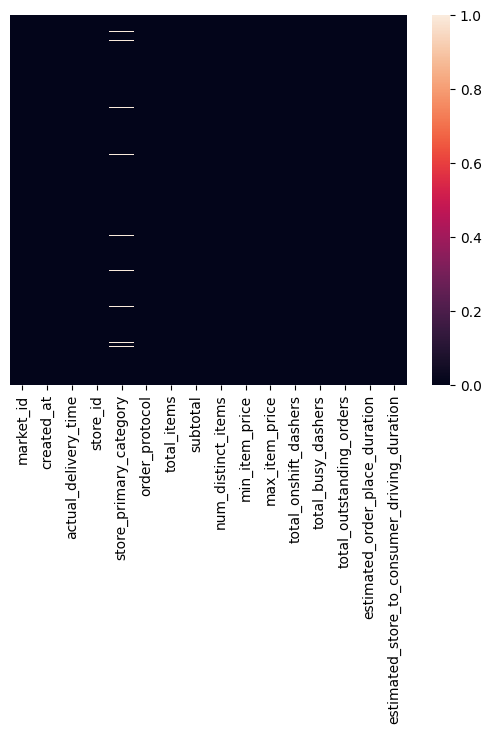

In [14]:
## Using HeatMap for better Visualization 
sns.heatmap(df1.isnull(), yticklabels=False)

In [15]:
df1.store_primary_category.unique()

array(['american', 'mexican', nan, 'indian', 'italian', 'sandwich',
       'thai', 'cafe', 'salad', 'pizza', 'chinese', 'singaporean',
       'burger', 'breakfast', 'mediterranean', 'japanese', 'greek',
       'catering', 'filipino', 'convenience-store', 'other', 'korean',
       'vegan', 'asian', 'barbecue', 'fast', 'dessert', 'smoothie',
       'seafood', 'vietnamese', 'cajun', 'steak', 'middle-eastern',
       'soup', 'vegetarian', 'persian', 'nepalese', 'sushi',
       'latin-american', 'hawaiian', 'chocolate', 'burmese', 'british',
       'pasta', 'alcohol', 'dim-sum', 'peruvian', 'turkish', 'malaysian',
       'ethiopian', 'afghan', 'bubble-tea', 'german', 'french',
       'caribbean', 'gluten-free', 'comfort-food', 'gastropub',
       'pakistani', 'moroccan', 'spanish', 'southern', 'tapas', 'russian',
       'brazilian', 'european', 'cheese', 'african', 'argentine',
       'kosher', 'irish', 'lebanese', 'belgian', 'indonesian',
       'alcohol-plus-food'], dtype=object)

In [16]:
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)
df1.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0


In [17]:
df1.isnull().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
dtype: int64

In [18]:
df1.shape

(192661, 16)

<AxesSubplot:>

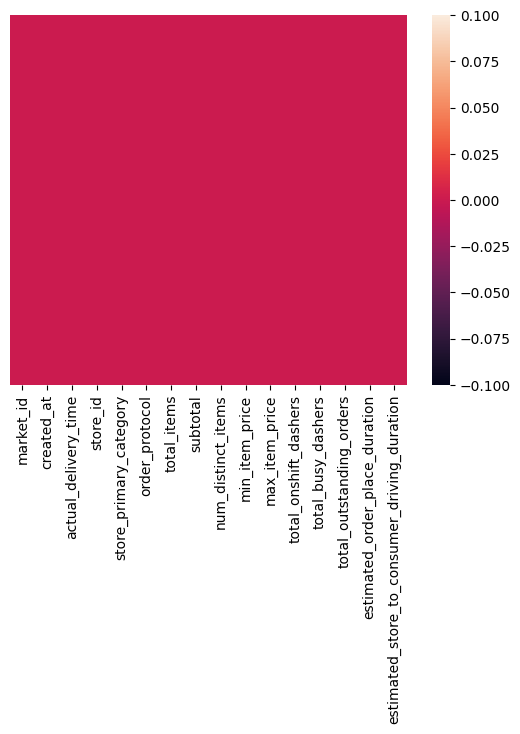

In [19]:
## Using HeatMap for better Visualization 
sns.heatmap(df1.isnull(), yticklabels=False)

In [20]:
df1.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,192661.000000,192661.000000,192661.000000,192661.000000,192661.000000,192661.000000,192661.000000,192661.000000,192661.000000,192661.000000,192661.000000,192661.000000,192661.000000
mean,2.971529,3540.187936,2.897934,3.193698,2679.682214,2.668091,685.642387,1158.202532,43.793573,40.784729,56.635398,307.452271,545.511365
std,1.522853,2051.581452,1.501270,2.668006,1822.749503,1.628674,520.255812,557.103461,33.987729,31.662261,51.798265,89.564752,219.302239
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1694.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,251.000000,383.000000
50%,3.000000,3600.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,35.000000,33.000000,39.000000,251.000000,544.000000
75%,4.000000,5302.000000,4.000000,4.000000,3393.000000,3.000000,949.000000,1395.000000,63.000000,61.000000,82.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [21]:
df1.nunique()

market_id                                           16
created_at                                      177040
actual_delivery_time                            174224
store_id                                          6569
store_primary_category                              74
order_protocol                                      14
total_items                                         57
subtotal                                          8322
num_distinct_items                                  20
min_item_price                                    2298
max_item_price                                    2632
total_onshift_dashers                            10418
total_busy_dashers                               10400
total_outstanding_orders                         10838
estimated_order_place_duration                      96
estimated_store_to_consumer_driving_duration      1539
dtype: int64

In [22]:
df1.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

In [23]:
#### Here we are creating the copy of the actual data which will be helpful for future analysis

drop_dash=df1.copy()
import datetime as dt

In [24]:
#### In the dummy data we are converting the 'created_at' and 'actual_delivery_time' to DataType 'datetime64'

drop_dash['created_at']=drop_dash['created_at'].astype('datetime64')
drop_dash['actual_delivery_time']=drop_dash['actual_delivery_time'].astype('datetime64')

In [25]:
drop_dash['created_at'].describe()

count                  192661
unique                 177040
top       2015-01-24 01:56:33
freq                        6
first     2014-10-19 05:24:15
last      2015-02-18 06:00:44
Name: created_at, dtype: object

In [26]:
#Creating a new Column where we can see the Delivery Time 

dlv_time=drop_dash['actual_delivery_time']-drop_dash['created_at']
drop_dash['delivery_time']=dlv_time.dt.seconds

In [27]:
####COnverting the value in minutes 
drop_dash['delivery_time'].mean()/60

47.6799687015016

In [28]:
#### Using the above output we can see that the estimated Delivery Time is 47.6799687015016

In [29]:
drop_dash.isnull().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
delivery_time                                   0
dtype: int64

In [30]:
drop_dash2=drop_dash.copy()

In [31]:
outlier_cols=['total_items','max_item_price','delivery_time','estimated_order_place_duration','min_item_price','num_distinct_items','estimated_store_to_consumer_driving_duration']
drop_dash2[outlier_cols].describe()

,total_items,max_item_price,delivery_time,estimated_order_place_duration,min_item_price,num_distinct_items,estimated_store_to_consumer_driving_duration
count,192661.000000,192661.000000,192661.000000,192661.000000,192661.000000,192661.000000,192661.000000
mean,3.193698,1158.202532,2860.798122,307.452271,685.642387,2.668091,545.511365
std,2.668006,557.103461,1181.074133,89.564752,520.255812,1.628674,219.302239
min,1.000000,0.000000,101.000000,0.000000,-86.000000,1.000000,0.000000
25%,2.000000,799.000000,2104.000000,251.000000,299.000000,1.000000,383.000000
50%,3.000000,1095.000000,2659.000000,251.000000,595.000000,2.000000,544.000000
75%,4.000000,1395.000000,3379.000000,446.000000,949.000000,3.000000,702.000000
max,411.000000,14700.000000,73282.000000,2715.000000,14700.000000,20.000000,2088.000000


In [32]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers


def print_outliers(df):
  outliers = find_outliers_IQR(df)
  if len(outliers) > 0:
    print(df.name)
    print('number of outliers: '+ str(len(outliers)))
    print('max outlier value: '+ str(outliers.max()))
    print('min outlier value: '+ str(outliers.min()) + '\n')
    
    print(df.shape)

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [33]:
drop_dash2.select_dtypes(exclude=object).apply(print_outliers)

created_at
number of outliers: 1
max outlier value: 2014-10-19 05:24:15
min outlier value: 2014-10-19 05:24:15

(192661,)
total_items
number of outliers: 9339
max outlier value: 411
min outlier value: 8

(192661,)
subtotal
number of outliers: 8830
max outlier value: 27100
min outlier value: 6383

(192661,)
num_distinct_items
number of outliers: 5758
max outlier value: 20
min outlier value: 7

(192661,)
min_item_price
number of outliers: 4395
max outlier value: 14700
min outlier value: 1925

(192661,)
max_item_price
number of outliers: 7510
max outlier value: 14700
min outlier value: 2290

(192661,)
total_onshift_dashers
number of outliers: 2412
max outlier value: 171.0
min outlier value: 132.67857142857144

(192661,)
total_busy_dashers
number of outliers: 820
max outlier value: 154.0
min outlier value: 131.0

(192661,)
total_outstanding_orders
number of outliers: 6871
max outlier value: 285.0
min outlier value: 179.7826086956522

(192661,)
estimated_order_place_duration
number of outli

market_id                                       None
created_at                                      None
actual_delivery_time                            None
store_id                                        None
order_protocol                                  None
total_items                                     None
subtotal                                        None
num_distinct_items                              None
min_item_price                                  None
max_item_price                                  None
total_onshift_dashers                           None
total_busy_dashers                              None
total_outstanding_orders                        None
estimated_order_place_duration                  None
estimated_store_to_consumer_driving_duration    None
delivery_time                                   None
dtype: object

In [34]:
drop_dash2=drop_dash2.reset_index().drop('index',axis=1)

<AxesSubplot:>

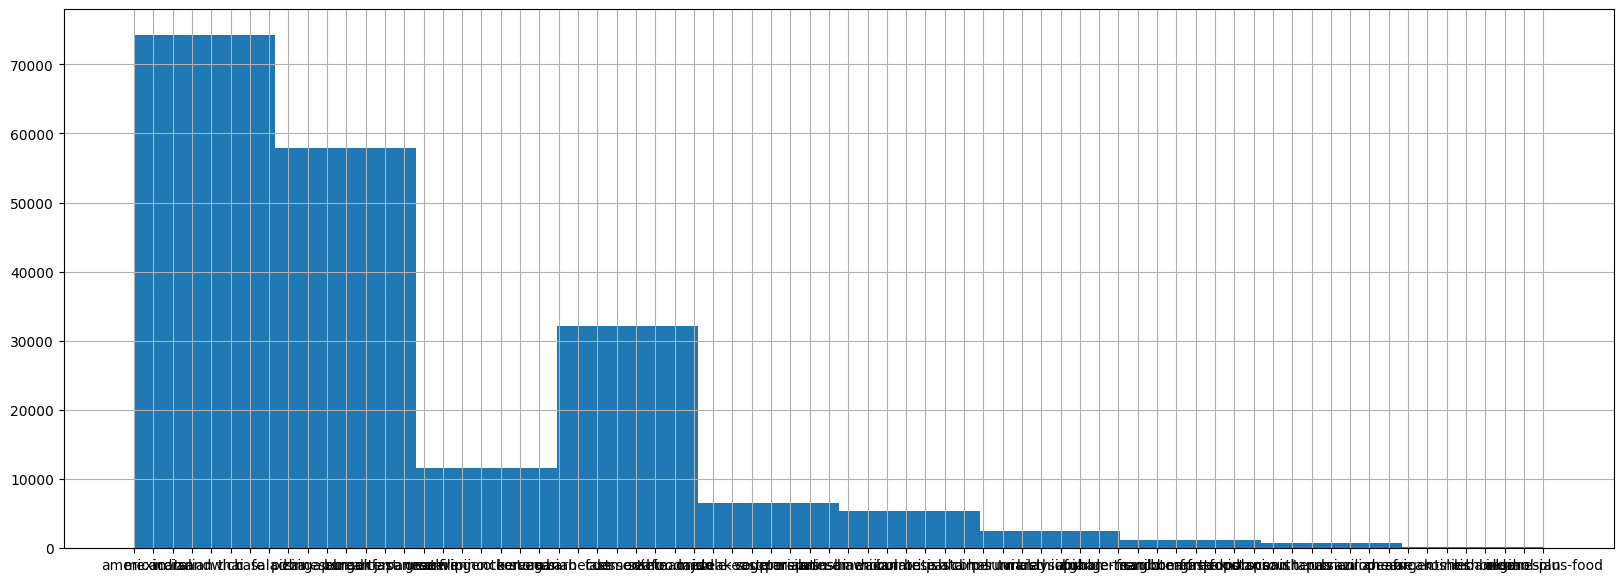

In [35]:
plt.figure(figsize=(20,7))
drop_dash2['store_primary_category'].hist()

In [36]:
drop_dash2.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_time'],
      dtype='object')

In [37]:
drop_dash2.total_onshift_dashers.value_counts()

0.000000     3579
15.000000    2889
18.000000    2885
21.000000    2809
19.000000    2794
             ... 
18.384615       1
10.055556       1
45.338235       1
84.636364       1
48.083333       1
Name: total_onshift_dashers, Length: 10418, dtype: int64

The availability of dashers slightly correlates with the delivery time with onshift at 0.06292824190898408 and busy at 0.08077356330892521


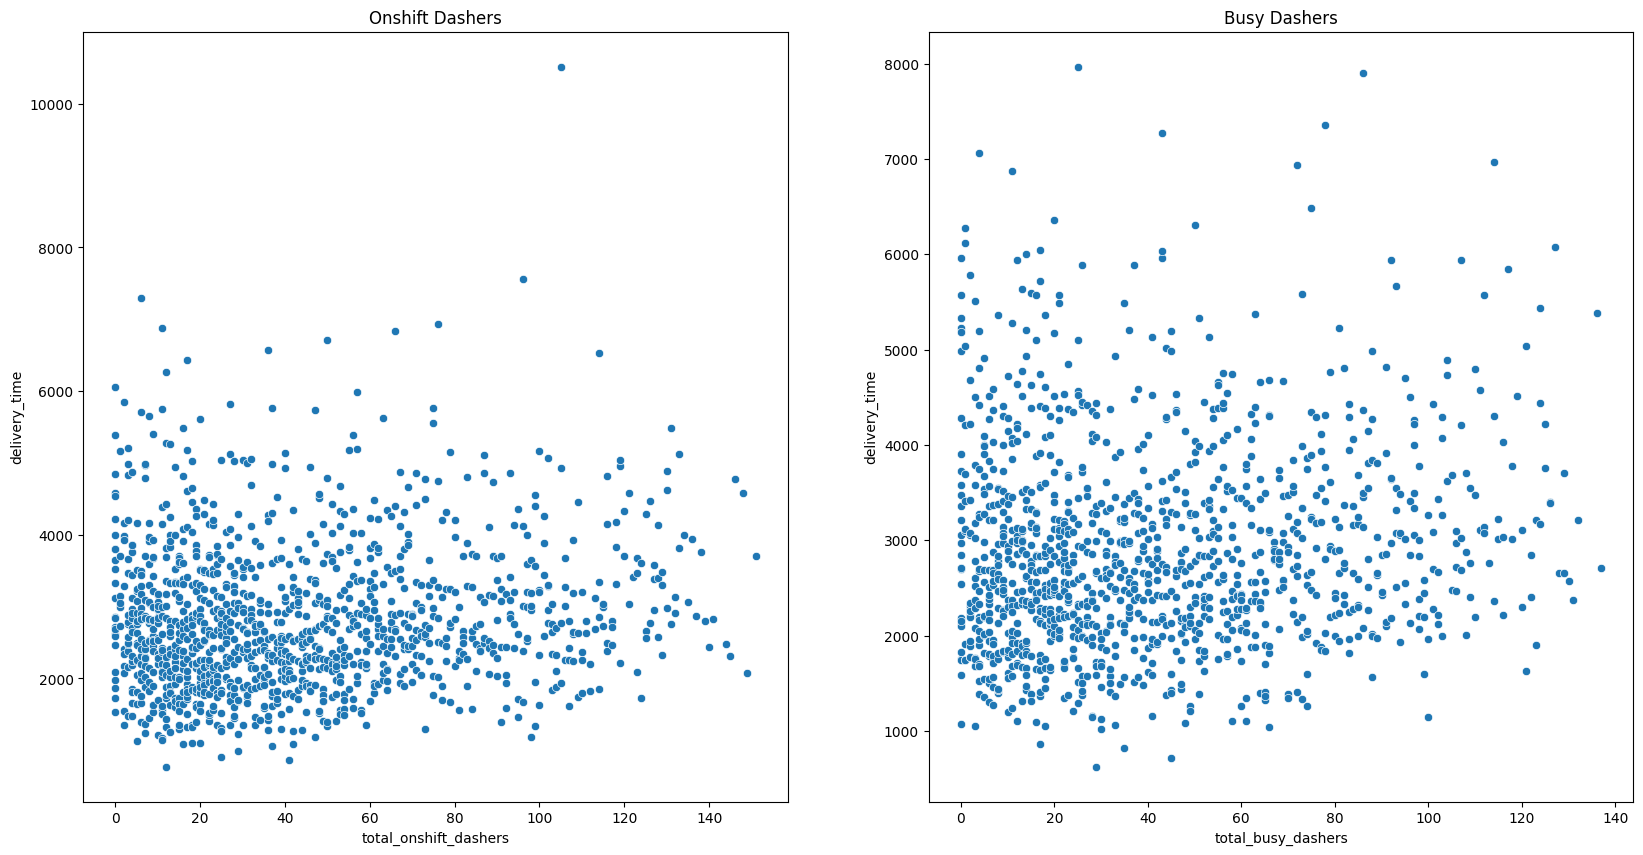

In [38]:
fig, axes = plt.subplots(1, 2,figsize=(20,10))
onshift_dashers=drop_dash2.groupby('total_onshift_dashers', group_keys=False).apply(lambda x: x.sample(frac=0.007))
sns.scatterplot(ax=axes[0],data=onshift_dashers, x="total_onshift_dashers", y="delivery_time")
axes[0].set_title('Onshift Dashers')

offshift_dashers=drop_dash2.groupby('total_busy_dashers', group_keys=False).apply(lambda x: x.sample(frac=0.007))
sns.scatterplot(ax=axes[1],data=offshift_dashers, x="total_busy_dashers", y="delivery_time")
axes[1].set_title('Busy Dashers')

print('The availability of dashers slightly correlates with the delivery time with onshift at {} and busy at {}'.format(drop_dash2.total_onshift_dashers.corr(drop_dash2['delivery_time']),drop_dash2.total_busy_dashers.corr(drop_dash2['delivery_time'])))

In [39]:
##### The availability of dashers slightly correlates with the delivery time with onshift at 0.06787577796649441 and busy at 0.08692829554298934

The amount of items seem to differ slightly witha correlation value of 0.10851966563082643 with delivery time as the more items the more time the minimum delviery takes

On the other hand there is little to no relation between min and max item price with 0.015270785811801838 and 0.1254898971198442 respectively



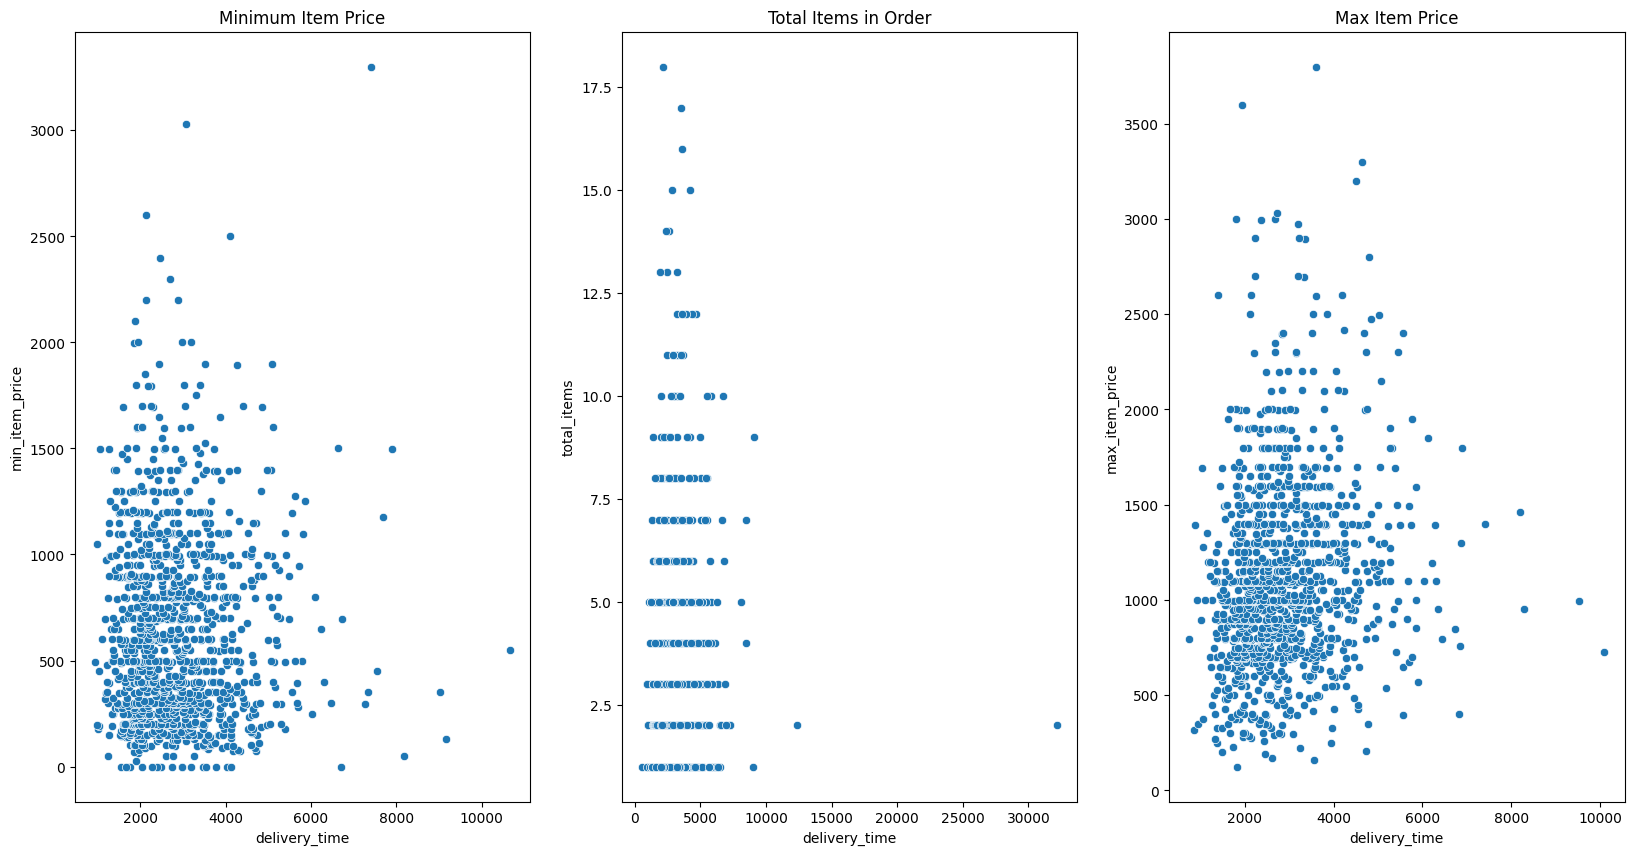

In [40]:
fig, axes = plt.subplots(1, 3,figsize=(20,10))

min_item=drop_dash2.groupby('min_item_price', group_keys=False).apply(lambda x: x.sample(frac=0.007))
sns.scatterplot(ax=axes[0],data=min_item, x="delivery_time", y="min_item_price")
axes[0].set_title('Minimum Item Price')

item_count=drop_dash2.groupby('total_items', group_keys=False).apply(lambda x: x.sample(frac=0.007))
sns.scatterplot(ax=axes[1],data=item_count, x="delivery_time", y="total_items")
axes[1].set_title('Total Items in Order')


max_item=drop_dash2.groupby('max_item_price', group_keys=False).apply(lambda x: x.sample(frac=0.007))
sns.scatterplot(ax=axes[2],data=max_item, x="delivery_time", y="max_item_price")
axes[2].set_title('Max Item Price')

print('The amount of items seem to differ slightly witha correlation value of {} with delivery time as the more items the more time the minimum delviery takes\n'.format(drop_dash2.total_items.corr(drop_dash2['delivery_time'])))
print('On the other hand there is little to no relation between min and max item price with {} and {} respectively\n'.format(drop_dash2.min_item_price.corr(drop_dash2['delivery_time']),drop_dash2.max_item_price.corr(drop_dash2['delivery_time'])))


In [41]:
drop_dash2.groupby('store_primary_category').delivery_time.agg(['min','max','mean']).sort_values(by='mean',ascending=True).head(10)

,min,max,mean
store_primary_category,,,
chocolate,2048,2048,2048.000000
indonesian,2442,2448,2445.000000
kosher,1250,6347,2494.568627
gluten-free,1136,4949,2521.709677
fast,516,18809,2631.216389
turkish,750,6676,2666.506329
mexican,101,38143,2672.812083
smoothie,386,22912,2681.460518
sandwich,223,22737,2685.642112


<AxesSubplot:xlabel='delivery_time', ylabel='store_primary_category'>

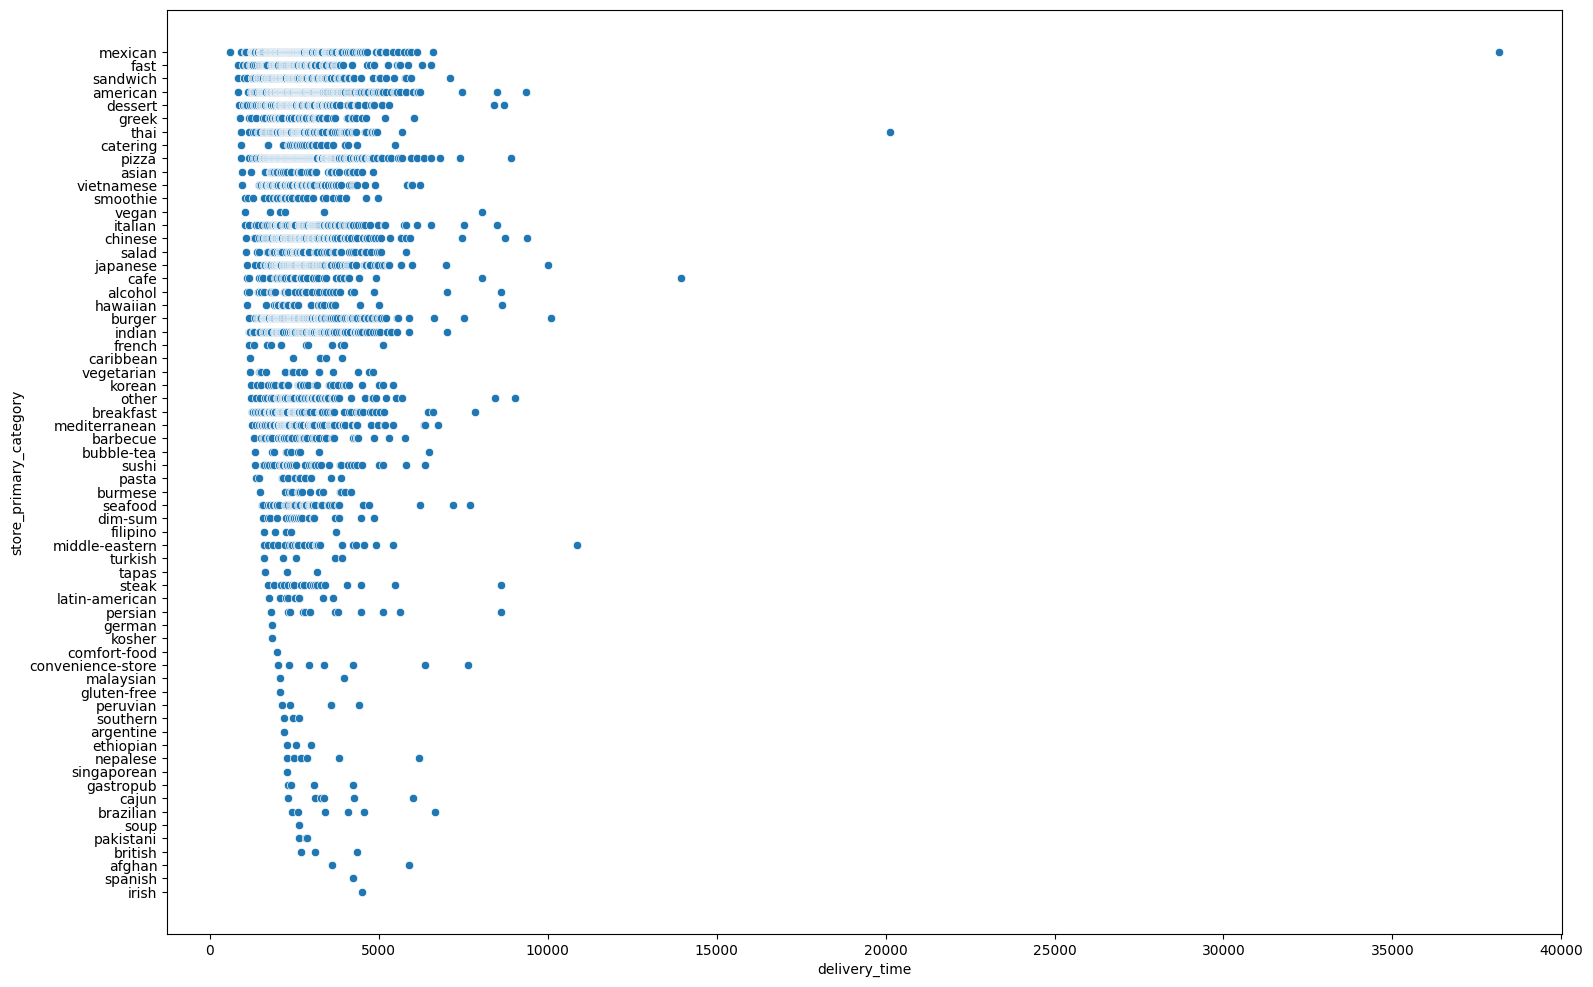

In [42]:
store_cat=drop_dash2.groupby('store_primary_category', group_keys=False).apply(lambda x: x.sample(frac=0.02)).sort_values(by='delivery_time')
plt.figure(figsize=(18,12))
sns.scatterplot(data=store_cat, x="delivery_time", y="store_primary_category")

In [43]:
store=drop_dash2.groupby(['store_id','store_primary_category']).delivery_time.agg(['min','max','mean','count']).sort_values(by=['count','mean'],ascending=False).reset_index()
store.head(10)

,store_id,store_primary_category,min,max,mean,count
0,6865,mexican,297,25598,2259.414221,886
1,1311,american,862,12117,2774.952147,815
2,314,mexican,386,9062,2389.289032,775
3,1686,mexican,626,5914,2313.221300,723
4,3937,salad,896,9070,3234.600601,666
5,6917,vietnamese,559,7727,2562.875197,633
6,6074,sushi,811,10515,2838.466443,596
7,4367,salad,1010,10157,3507.157324,553
8,3748,mediterranean,1003,9963,2946.893536,526
9,6503,dessert,854,28279,2626.122841,521


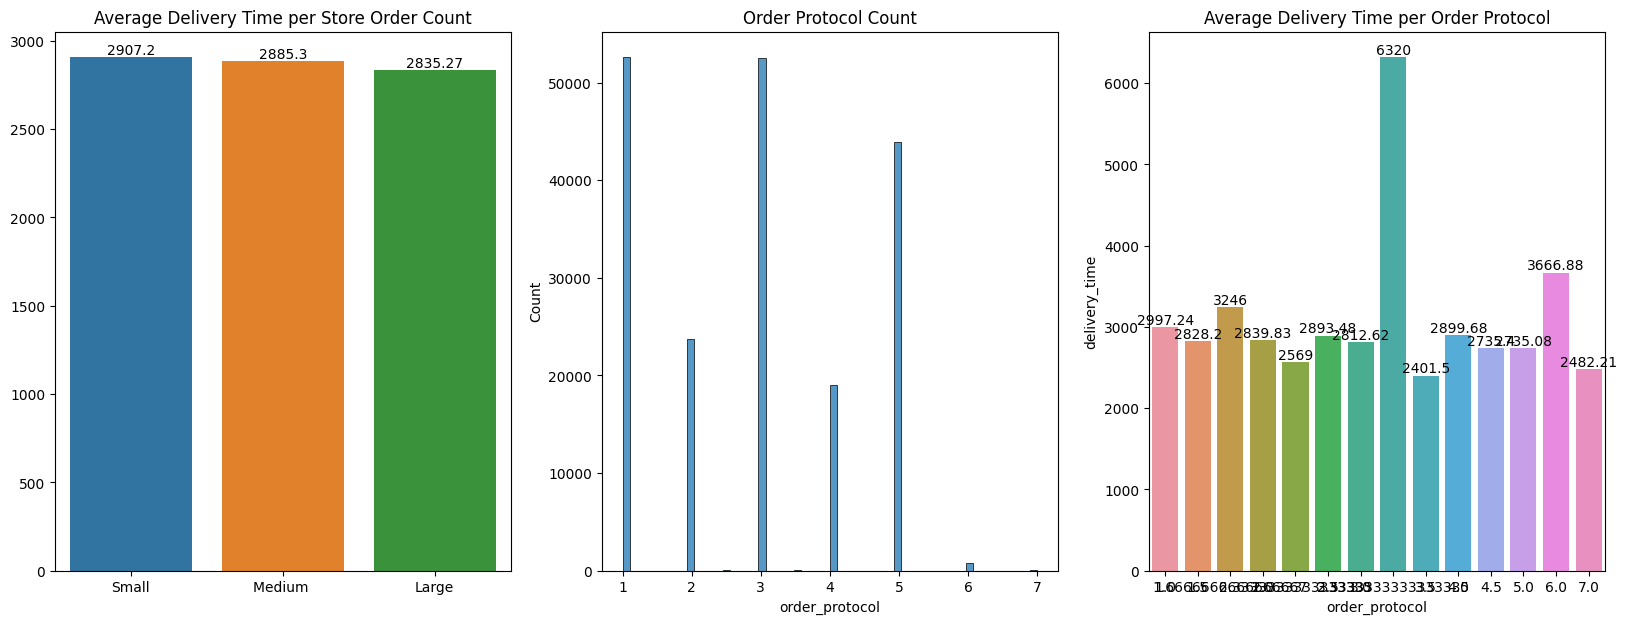

In [44]:
fig, axes = plt.subplots(1, 3,figsize=(20,7))
small=store.loc[store['count']<10]['mean'].mean()
mid=store.loc[(store['count']>10) & (store['count']<400)]['mean'].mean()
large=store.loc[store['count']>400]['mean'].mean()

graph1=sns.barplot(ax=axes[0],x=["Small","Medium ","Large"], y=[small,mid,large])
axes[0].set_title('Average Delivery Time per Store Order Count')
axes[0].ylabel='Average Delivery Time'
axes[0].xlabel='Store order Count'
graph1.bar_label(axes[0].containers[-1])

graph2=sns.histplot(data=drop_dash2, x="order_protocol",ax=axes[1])
axes[1].set_title('Order Protocol Count')


order_proto=drop_dash2.groupby('order_protocol').delivery_time.mean().reset_index()
graph=sns.barplot(ax=axes[2],data=order_proto,x='order_protocol', y='delivery_time')
axes[2].set_title('Average Delivery Time per Order Protocol')
for i in graph.containers:
    axes[2].bar_label(i,)

In [45]:
drop_dash2.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_time'],
      dtype='object')

In [46]:
drop_dash2['total_free_dashers']=drop_dash2['total_onshift_dashers']-drop_dash2['total_busy_dashers']

In [47]:
#storedash=
drop_dash2.groupby(['store_id'])['total_onshift_dashers','total_busy_dashers','total_free_dashers','total_outstanding_orders'].mean().sort_values(by=['total_free_dashers'],ascending=False).head(20)

,total_onshift_dashers,total_busy_dashers,total_free_dashers,total_outstanding_orders
store_id,,,,
2417,102.172414,57.310345,44.862069,89.810345
2266,102.000000,60.000000,42.000000,112.000000
174,91.375000,54.500000,36.875000,98.375000
1035,114.666667,80.666667,34.000000,119.000000
1320,112.818182,80.090909,32.727273,169.727273
2513,113.250000,80.750000,32.500000,107.500000
6093,128.000000,97.500000,30.500000,150.000000
4277,68.500000,41.500000,27.000000,54.000000
3683,78.500000,53.500000,25.000000,89.000000


<AxesSubplot:xlabel='estimated_store_to_consumer_driving_duration', ylabel='delivery_time'>

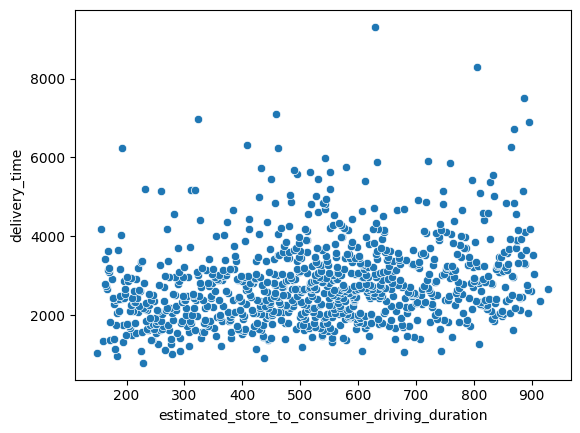

In [48]:
driving=drop_dash2.groupby('estimated_store_to_consumer_driving_duration', group_keys=False).apply(lambda x: x.sample(frac=0.005)).sort_values(by='delivery_time')
sns.scatterplot(data=driving, x="estimated_store_to_consumer_driving_duration", y="delivery_time")

In [49]:
cor=drop_dash2.corr().reset_index()
cor[['index','delivery_time']].sort_values(by='delivery_time',ascending=False)

,index,delivery_time
13,delivery_time,1.000000
12,estimated_store_to_consumer_driving_duration,0.220264
4,subtotal,0.201416
10,total_outstanding_orders,0.160350
5,num_distinct_items,0.145595
7,max_item_price,0.125490
3,total_items,0.108520
11,estimated_order_place_duration,0.096223
9,total_busy_dashers,0.080774
8,total_onshift_dashers,0.062928


In [50]:
drop_dash3=drop_dash2.copy()
drop_dash3=drop_dash3.drop(['created_at','actual_delivery_time'],axis=1)

In [51]:
scaler=StandardScaler()
drop_dash3_scaled=pd.DataFrame(preprocessing.scale(drop_dash3.loc[:, drop_dash3.columns != 'store_primary_category']),columns=drop_dash3.loc[:, drop_dash3.columns != 'store_primary_category'].columns)
drop_dash3_dummied=pd.get_dummies(drop_dash3['store_primary_category'])
frames = [drop_dash3_scaled, drop_dash3_dummied]
drop_dash3 = pd.concat(frames,axis=1)
drop_dash3

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,...,southern,spanish,steak,sushi,tapas,thai,turkish,vegan,vegetarian,vietnamese
0,-1.294632,-0.826286,-1.264222,0.302212,0.417677,0.817790,-0.247268,0.145032,-0.317573,-0.845953,...,0,0,0,0,0,0,0,0,0,0
1,-0.637968,0.944061,-0.598118,-0.822226,-0.427752,-1.024204,1.373093,0.434027,-1.259092,-1.224955,...,0,0,0,0,0,0,0,0,0,0
2,-0.637968,0.944061,0.067987,0.302212,1.147345,0.203792,0.258254,0.800208,-1.053135,-1.098621,...,0,0,0,0,0,0,0,0,0,0
3,-1.294632,-0.340805,-1.264222,-0.822226,-0.633485,-1.024204,1.613360,0.658403,-1.141402,-1.098621,...,0,0,0,0,0,0,0,0,0,0
4,-1.294632,-0.340805,-1.264222,-0.447413,0.515880,-0.410206,1.421146,1.861055,-1.141402,-1.130204,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192656,-1.294632,-0.284751,0.734091,-0.072600,-0.708098,0.203792,-0.654761,-0.914020,-0.788333,-0.751203,...,0,0,0,0,0,0,0,0,0,0
192657,-1.294632,-0.284751,0.734091,1.051838,0.181220,0.817790,-0.539433,-0.598100,-0.935445,-0.940704,...,0,0,0,0,0,0,0,0,0,0
192658,-1.294632,-0.284751,0.734091,0.677025,-0.462864,0.203792,-0.741257,-1.362771,-0.141039,0.006799,...,0,0,0,0,0,0,0,0,0,0
192659,-1.294632,0.043777,-1.264222,-0.822226,-0.825504,-1.024204,-0.289555,-1.118651,-1.082557,-1.067037,...,0,0,0,0,0,0,0,0,0,0


In [52]:
### MODEL BUILDING

In [53]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
pipe = Pipeline(steps=[('scaler', StandardScaler()),('One Hot Encoding',OneHotEncoder())])

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def predictmodels(clf_A,clf_B,clf_C,X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  print("Training set has {} samples.".format(X_train.shape[0]))
  print("Testing set has {} samples.".format(X_test.shape[0]))
  print()
  results = {}
  df = pd.DataFrame()
  for clf in [clf_A, clf_B, clf_C]:
      clf_name = clf.__class__.__name__
      results[clf_name] = {}
      results[clf_name] = \
      clf = clf.fit(X_train, y_train)
      try:
        predictions_test = clf.predict(X_test)
      except:
        predictions_test = clf_A.predict(X_test)
     # print(clf)
     # print("MSE",mean_squared_error(y_test,predictions_test))
     # print("RMSE",np.sqrt(mean_squared_error(y_test,predictions_test)))
     # print("R2",r2_score(y_test,predictions_test))
     # print()
      row={'MSE':mean_squared_error(y_test,predictions_test),'RMSE':np.sqrt(mean_squared_error(y_test,predictions_test)),'R2':r2_score(y_test,predictions_test)}
      rows=[mean_squared_error(y_test,predictions_test),np.sqrt(mean_squared_error(y_test,predictions_test)),r2_score(y_test,predictions_test)]
      d = {clf_name: row}
      if df.empty:
        df=pd.DataFrame(data=d)
      else:
        df[clf_name]=rows
  return df

In [55]:
X=drop_dash3
y=drop_dash3['delivery_time']
X=X.drop(columns=["delivery_time",'market_id'])
predictmodels(LinearRegression(),linear_model.Lasso(random_state=3),PolynomialFeatures(),X,y)

Training set has 154128 samples.
Testing set has 38533 samples.



,LinearRegression,Lasso,PolynomialFeatures
MSE,0.837226,1.025289,0.837226
R2,0.183423,1.012566,0.915000
RMSE,0.915000,-0.000002,0.183423


In [56]:
predictmodels(DecisionTreeRegressor(random_state=3),RandomForestRegressor(random_state=3),linear_model.BayesianRidge(),X,y)

Training set has 154128 samples.
Testing set has 38533 samples.



,DecisionTreeRegressor,RandomForestRegressor,BayesianRidge
MSE,1.638048,0.827987,0.837167
R2,-0.597647,0.909938,0.914968
RMSE,1.279862,0.192434,0.183481
